In [1]:
#!/bin/env python
#coding: utf-8

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])


def generator(noise, labels):
	with tf.variable_scope('generator'):
		inputs = tf.concat([noise, labels], 1)

		hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
		output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)

	return output


def discriminator(inputs, labels, reuse=None):
	with tf.variable_scope('discriminator') as scope:
		if reuse:
			scope.reuse_variables()

		inputs = tf.concat([inputs, labels], 1)
		hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
		output = tf.layers.dense(hidden, 1, activation=None)

	return output


def get_noise(batch_size, n_noise):
	return np.random.uniform(-1., 1., size=[batch_size, n_noise])

G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

loss_D_real = tf.reduce_mean(
				tf.nn.sigmoid_cross_entropy_with_logits(
					logits=D_real, labels=tf.ones_like(D_real)
				)
)
loss_D_gene = tf.reduce_mean(
				tf.nn.sigmoid_cross_entropy_with_logits(
					logits=D_gene, labels=tf.zeros_like(D_gene)
				)
)
loss_D = loss_D_real + loss_D_gene

loss_G = tf.reduce_mean(
			tf.nn.sigmoid_cross_entropy_with_logits(
				logits=D_gene, labels=tf.ones_like(D_gene)
			)
)

vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list=vars_G)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
	for i in range(total_epoch):
		batch_xs, batch_ys = mnist.train.next_batch(batch_size)
		noise = get_noise(batch_size, n_noise)

		_, loss_val_D = sess.run(
							[train_D, loss_D],
							feed_dict={X: batch_xs, Y: batch_ys, Z: noise}
		)
		_, loss_val_G = sess.run(
							[train_G, loss_G],
							feed_dict={Y: batch_ys, Z: noise}
		)

	print(
		'Epoch:', '%04d' % epoch,
		'D loss: {:.4}'.format(loss_val_D),
		'G loss: {:.4}'.format(loss_val_G),
	)

	if epoch == 0 or (epoch + 1) % 10 == 0:
		sample_size = 10
		noise = get_noise(sample_size, n_noise)
		samples = sess.run(
					G,
					feed_dict={Y: mnist.test.labels[:sample_size], Z: noise}
		)

		fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

		for i in range(sample_size):
			ax[0][i].set_axis_off()
			ax[1][i].set_axis_off()

			ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
			ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

		plt.savefig('samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
		plt.close(fig)

print('Optimization Complete!')

Epoch: 0000 D loss: 0.2835 G loss: 3.508
Epoch: 0001 D loss: 0.05969 G loss: 5.691
Epoch: 0002 D loss: 0.006242 G loss: 6.42
Epoch: 0003 D loss: 0.0155 G loss: 7.139
Epoch: 0004 D loss: 0.008035 G loss: 6.803
Epoch: 0005 D loss: 0.005466 G loss: 7.427
Epoch: 0006 D loss: 0.004755 G loss: 8.717
Epoch: 0007 D loss: 0.01218 G loss: 6.191
Epoch: 0008 D loss: 0.01336 G loss: 5.464
Epoch: 0009 D loss: 0.06215 G loss: 6.387
Epoch: 0010 D loss: 0.0122 G loss: 8.135
Epoch: 0011 D loss: 0.01178 G loss: 7.239
Epoch: 0012 D loss: 0.00659 G loss: 7.22
Epoch: 0013 D loss: 0.007646 G loss: 7.353
Epoch: 0014 D loss: 0.09071 G loss: 5.694
Epoch: 0015 D loss: 0.01646 G loss: 6.703
Epoch: 0016 D loss: 0.01483 G loss: 8.138
Epoch: 0017 D loss: 0.01002 G loss: 6.269
Epoch: 0018 D loss: 0.01336 G loss: 5.739
Epoch: 0019 D loss: 0.02228 G loss: 4.931
Epoch: 0020 D loss: 0.01027 G loss: 6.459
Epoch: 0021 D loss: 0.01721 G loss: 6.212
Epoch: 0022 D loss: 0.01745 G loss: 7.361
Epoch: 0023 D loss: 0.07624 G loss

['000.png', '009.png', '019.png', '029.png', '039.png', '049.png', '059.png', '069.png', '079.png', '089.png', '099.png']


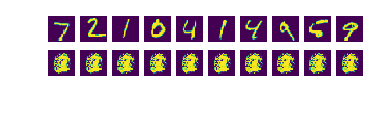

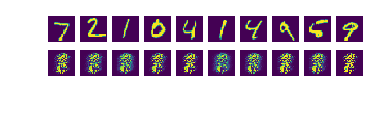

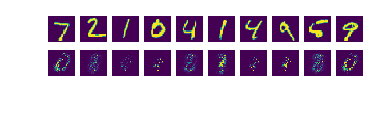

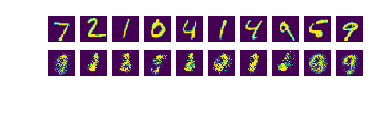

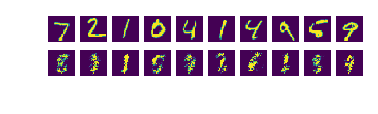

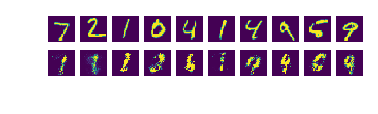

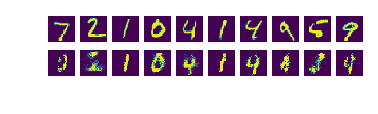

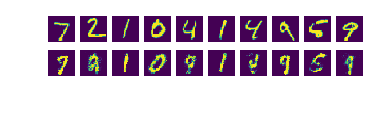

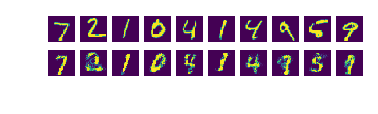

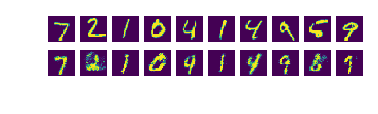

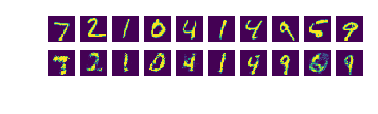

In [3]:
import matplotlib.image as mpimg

png_files = list(map(lambda x: '%03d.png' % x, [000] + [i*10 + 9 for i in range(10)]))
print(png_files)

for i in range(11):
    image = mpimg.imread('samples2/' + png_files[i])
    plt.figure()
    plt.axis('off')
    plt.imshow(image)

    plt.show()